In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown

In [2]:
train_df = pd.read_csv('/teamspace/studios/this_studio/data/s4e12/train.csv')
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [3]:
missing_stats = (train_df.isnull().sum() / len(train_df) * 100).round(2)
missing_stats = missing_stats[missing_stats > 0].sort_values(ascending=False)

missing_table = f"""
## Missing Values Analysis

| **Feature** | **Missing %** |
|:------------|-------------:|"""

for feature, pct in missing_stats.items():
    missing_table += f"\n| {feature} | {pct}% |"

# Create numerical statistics string
num_stats = train_df.describe().round(2)
num_table = f"""

## Numerical Features Statistics

| **Statistic** | {' | '.join(f'**{col}**' for col in num_stats.columns)} |
|:--------------|{' | '.join(['------------------:' for _ in num_stats.columns])}|"""

for stat in num_stats.index:
    num_table += f"\n| **{stat}** | {' | '.join(str(num_stats.loc[stat, col]) for col in num_stats.columns)} |"

# Combine and display
md_tables = missing_table + num_table
Markdown(md_tables)


## Missing Values Analysis

| **Feature** | **Missing %** |
|:------------|-------------:|
| Previous Claims | 30.34% |
| Occupation | 29.84% |
| Credit Score | 11.49% |
| Number of Dependents | 9.14% |
| Customer Feedback | 6.49% |
| Health Score | 6.17% |
| Annual Income | 3.75% |
| Age | 1.56% |
| Marital Status | 1.54% |

## Numerical Features Statistics

| **Statistic** | **id** | **Age** | **Annual Income** | **Number of Dependents** | **Health Score** | **Previous Claims** | **Vehicle Age** | **Credit Score** | **Insurance Duration** | **Premium Amount** |
|:--------------|------------------: | ------------------: | ------------------: | ------------------: | ------------------: | ------------------: | ------------------: | ------------------: | ------------------: | ------------------:|
| **count** | 1200000.0 | 1181295.0 | 1155051.0 | 1090328.0 | 1125924.0 | 835971.0 | 1199994.0 | 1062118.0 | 1199999.0 | 1200000.0 |
| **mean** | 599999.5 | 41.15 | 32745.22 | 2.01 | 25.61 | 1.0 | 9.57 | 592.92 | 5.02 | 1102.54 |
| **std** | 346410.31 | 13.54 | 32179.51 | 1.42 | 12.2 | 0.98 | 5.78 | 149.98 | 2.59 | 865.0 |
| **min** | 0.0 | 18.0 | 1.0 | 0.0 | 2.01 | 0.0 | 0.0 | 300.0 | 1.0 | 20.0 |
| **25%** | 299999.75 | 30.0 | 8001.0 | 1.0 | 15.92 | 0.0 | 5.0 | 468.0 | 3.0 | 514.0 |
| **50%** | 599999.5 | 41.0 | 23911.0 | 2.0 | 24.58 | 1.0 | 10.0 | 595.0 | 5.0 | 872.0 |
| **75%** | 899999.25 | 53.0 | 44634.0 | 3.0 | 34.53 | 2.0 | 15.0 | 721.0 | 7.0 | 1509.0 |
| **max** | 1199999.0 | 64.0 | 149997.0 | 4.0 | 58.98 | 9.0 | 19.0 | 849.0 | 9.0 | 4999.0 |

In [4]:
# Create binary flags for missing values
train_df['Claims_Missing'] = train_df['Previous Claims'].isnull()
train_df['Occupation_Missing'] = train_df['Occupation'].isnull()
train_df['Credit_Missing'] = train_df['Credit Score'].isnull()

# Analyze average premium for missing vs non-missing values
missing_premium_analysis = f"""
## Impact on Premium Amount

| **Feature** | **Avg Premium (Missing)** | **Avg Premium (Present)** | **% Difference** |
|:------------|------------------------:|------------------------:|---------------:|"""

for feature in ['Claims_Missing', 'Occupation_Missing', 'Credit_Missing']:
    avg_missing = train_df[train_df[feature]]['Premium Amount'].mean().round(2)
    avg_present = train_df[~train_df[feature]]['Premium Amount'].mean().round(2)
    pct_diff = ((avg_missing - avg_present) / avg_present * 100).round(2)
    
    feature_name = feature.replace('_Missing', '')
    missing_premium_analysis += f"\n| {feature_name} | {avg_missing} | {avg_present} | {pct_diff}% |"

# Analyze relationships between missing values
missing_correlation = f"""

## Missing Value Patterns

| **Feature Pair** | **Co-occurrence %** |
|:----------------|-------------------:|"""

features = ['Claims_Missing', 'Occupation_Missing', 'Credit_Missing']
for i in range(len(features)):
    for j in range(i+1, len(features)):
        both_missing = (train_df[features[i]] & train_df[features[j]]).mean() * 100
        pair_name = f"{features[i].replace('_Missing', '')} & {features[j].replace('_Missing', '')}"
        missing_correlation += f"\n| {pair_name} | {both_missing:.2f}% |"

# Combine analyses
md_analysis = missing_premium_analysis + missing_correlation

Markdown(md_analysis)


## Impact on Premium Amount

| **Feature** | **Avg Premium (Missing)** | **Avg Premium (Present)** | **% Difference** |
|:------------|------------------------:|------------------------:|---------------:|
| Claims | 1076.94 | 1113.69 | -3.3% |
| Occupation | 1093.32 | 1106.47 | -1.19% |
| Credit | 1085.62 | 1104.74 | -1.73% |

## Missing Value Patterns

| **Feature Pair** | **Co-occurrence %** |
|:----------------|-------------------:|
| Claims & Occupation | 9.07% |
| Claims & Credit | 3.43% |
| Occupation & Credit | 3.40% |

In [5]:
# Select numerical columns (excluding 'id' and target variable)
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in ['id', 'Premium Amount']]

# Create analysis string
numerical_analysis = f"""
## Numerical Features Analysis

| **Feature** | **Min** | **Max** | **Mean** | **Std** | **Invalid Values** |
|:------------|--------:|--------:|---------:|--------:|-----------------:|"""

for col in num_cols:
    stats = train_df[col].describe()
    
    # Check for invalid values based on business logic
    invalid_count = 0
    if col == 'Age':
        invalid_count = len(train_df[train_df[col] < 0]) + len(train_df[train_df[col] > 100])
    elif col == 'Annual Income':
        invalid_count = len(train_df[train_df[col] < 0])
    elif col == 'Credit Score':
        invalid_count = len(train_df[(train_df[col] < 300) | (train_df[col] > 850)])
    elif col == 'Number of Dependents':
        invalid_count = len(train_df[train_df[col] < 0])
    
    numerical_analysis += f"\n| {col} | {stats['min']:.2f} | {stats['max']:.2f} | {stats['mean']:.2f} | {stats['std']:.2f} | {invalid_count} |"

Markdown(numerical_analysis)


## Numerical Features Analysis

| **Feature** | **Min** | **Max** | **Mean** | **Std** | **Invalid Values** |
|:------------|--------:|--------:|---------:|--------:|-----------------:|
| Age | 18.00 | 64.00 | 41.15 | 13.54 | 0 |
| Annual Income | 1.00 | 149997.00 | 32745.22 | 32179.51 | 0 |
| Number of Dependents | 0.00 | 4.00 | 2.01 | 1.42 | 0 |
| Health Score | 2.01 | 58.98 | 25.61 | 12.20 | 0 |
| Previous Claims | 0.00 | 9.00 | 1.00 | 0.98 | 0 |
| Vehicle Age | 0.00 | 19.00 | 9.57 | 5.78 | 0 |
| Credit Score | 300.00 | 849.00 | 592.92 | 149.98 | 0 |
| Insurance Duration | 1.00 | 9.00 | 5.02 | 2.59 | 0 |

In [6]:
# Select numerical columns (excluding 'id' and target variable)
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in ['id', 'Premium Amount']]

# Create analysis string with quartile information and IQR
outlier_analysis = f"""
## Outlier Analysis for Numerical Features

| **Feature** | **Q1** | **Q3** | **IQR** | **Lower Bound** | **Upper Bound** | **Outliers %** |
|:------------|-------:|-------:|--------:|----------------:|----------------:|-------------:|"""

for col in num_cols:
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(train_df) * 100)
    
    outlier_analysis += f"\n| {col} | {q1:.2f} | {q3:.2f} | {iqr:.2f} | {lower_bound:.2f} | {upper_bound:.2f} | {outlier_percentage:.2f} |"

Markdown(outlier_analysis)


## Outlier Analysis for Numerical Features

| **Feature** | **Q1** | **Q3** | **IQR** | **Lower Bound** | **Upper Bound** | **Outliers %** |
|:------------|-------:|-------:|--------:|----------------:|----------------:|-------------:|
| Age | 30.00 | 53.00 | 23.00 | -4.50 | 87.50 | 0.00 |
| Annual Income | 8001.00 | 44634.00 | 36633.00 | -46948.50 | 99583.50 | 5.59 |
| Number of Dependents | 1.00 | 3.00 | 2.00 | -2.00 | 6.00 | 0.00 |
| Health Score | 15.92 | 34.53 | 18.61 | -11.99 | 62.44 | 0.00 |
| Previous Claims | 0.00 | 2.00 | 2.00 | -3.00 | 5.00 | 0.03 |
| Vehicle Age | 5.00 | 15.00 | 10.00 | -10.00 | 30.00 | 0.00 |
| Credit Score | 468.00 | 721.00 | 253.00 | 88.50 | 1100.50 | 0.00 |
| Insurance Duration | 3.00 | 7.00 | 4.00 | -3.00 | 13.00 | 0.00 |

In [7]:
# Select categorical columns
cat_cols = train_df.select_dtypes(include=['object']).columns

# Create analysis string
categorical_analysis = f"""
## Categorical Features Analysis

| **Feature** | **Unique Values** | **Most Common (%)** | **2nd Most Common (%)** | **Least Common (%)** |
|:------------|------------------:|-------------------:|----------------------:|-------------------:|"""

for col in cat_cols:
    value_counts = train_df[col].value_counts(normalize=True) * 100
    n_unique = len(value_counts)
    
    most_common = f"{value_counts.index[0]} ({value_counts.values[0]:.1f}%)"
    second_common = f"{value_counts.index[1]} ({value_counts.values[1]:.1f}%)"
    least_common = f"{value_counts.index[-1]} ({value_counts.values[-1]:.1f}%)"
    
    categorical_analysis += f"\n| {col} | {n_unique} | {most_common} | {second_common} | {least_common} |"

Markdown(categorical_analysis)


## Categorical Features Analysis

| **Feature** | **Unique Values** | **Most Common (%)** | **2nd Most Common (%)** | **Least Common (%)** |
|:------------|------------------:|-------------------:|----------------------:|-------------------:|
| Gender | 2 | Male (50.2%) | Female (49.8%) | Female (49.8%) |
| Marital Status | 3 | Single (33.5%) | Married (33.4%) | Divorced (33.2%) |
| Education Level | 4 | Master's (25.3%) | PhD (25.3%) | High School (24.1%) |
| Occupation | 3 | Employed (33.6%) | Self-Employed (33.6%) | Unemployed (32.8%) |
| Location | 3 | Suburban (33.5%) | Rural (33.4%) | Urban (33.1%) |
| Policy Type | 3 | Premium (33.5%) | Comprehensive (33.3%) | Basic (33.2%) |
| Policy Start Date | 167381 | 2020-02-08 15:21:39.134960 (0.0%) | 2022-02-02 15:21:39.134960 (0.0%) | 2024-07-22 15:21:39.217387 (0.0%) |
| Customer Feedback | 3 | Average (33.7%) | Poor (33.5%) | Good (32.9%) |
| Smoking Status | 2 | Yes (50.2%) | No (49.8%) | No (49.8%) |
| Exercise Frequency | 4 | Weekly (25.5%) | Monthly (25.0%) | Daily (24.5%) |
| Property Type | 3 | House (33.4%) | Apartment (33.3%) | Condo (33.3%) |

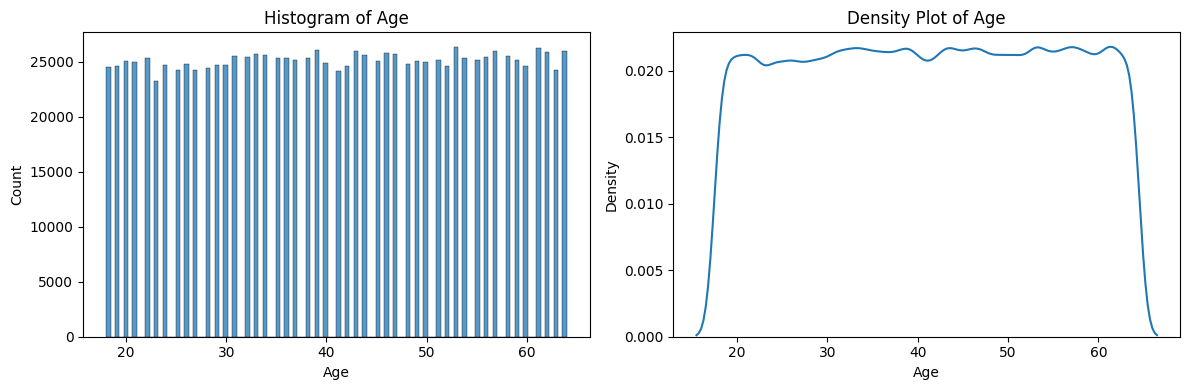

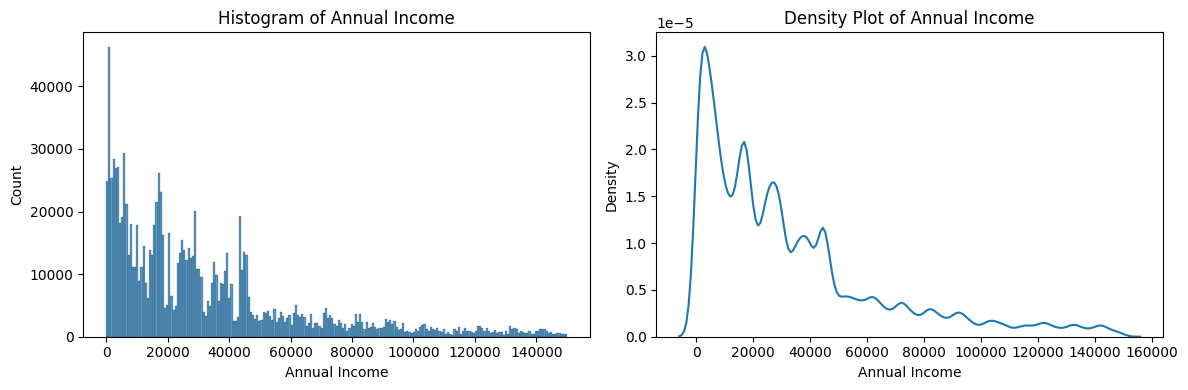

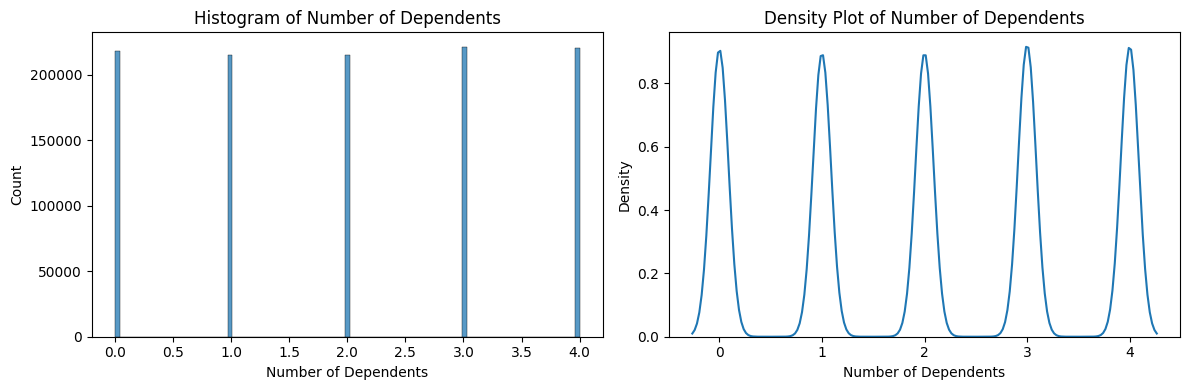

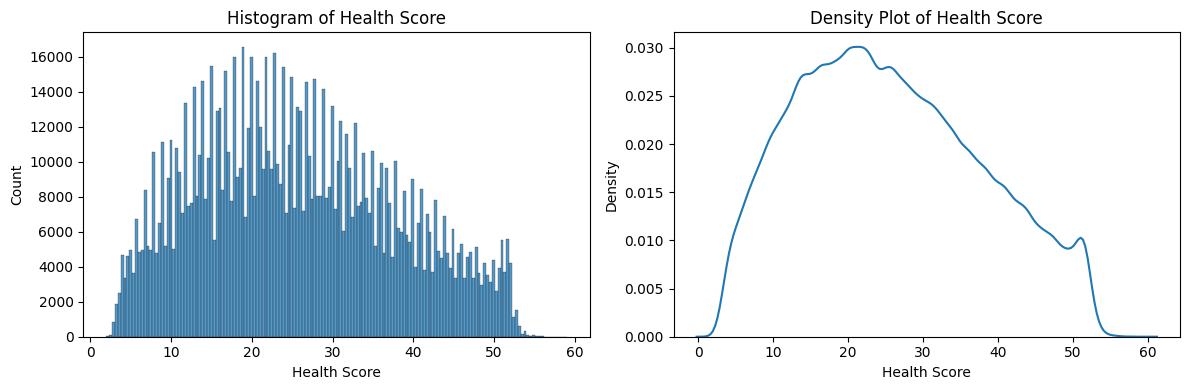

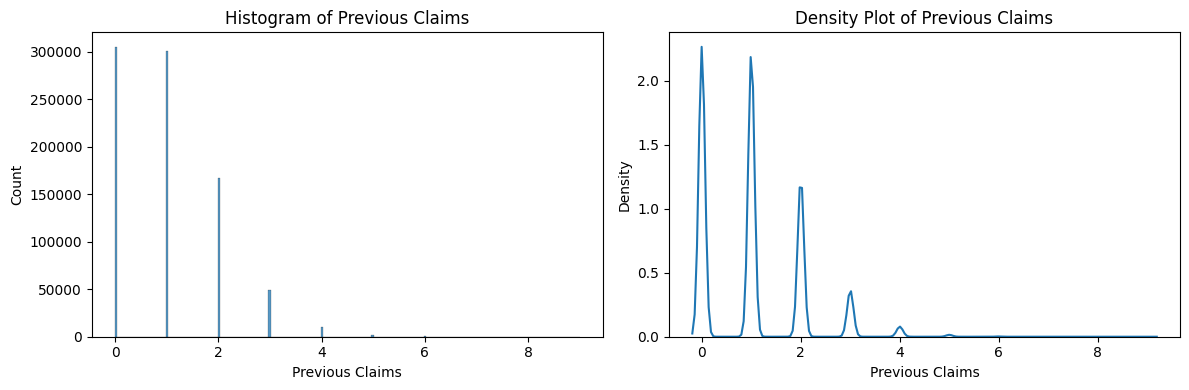

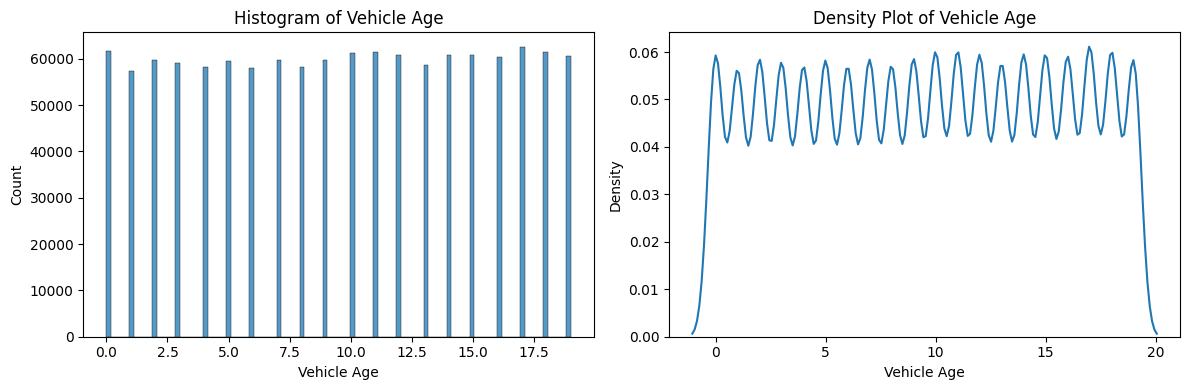

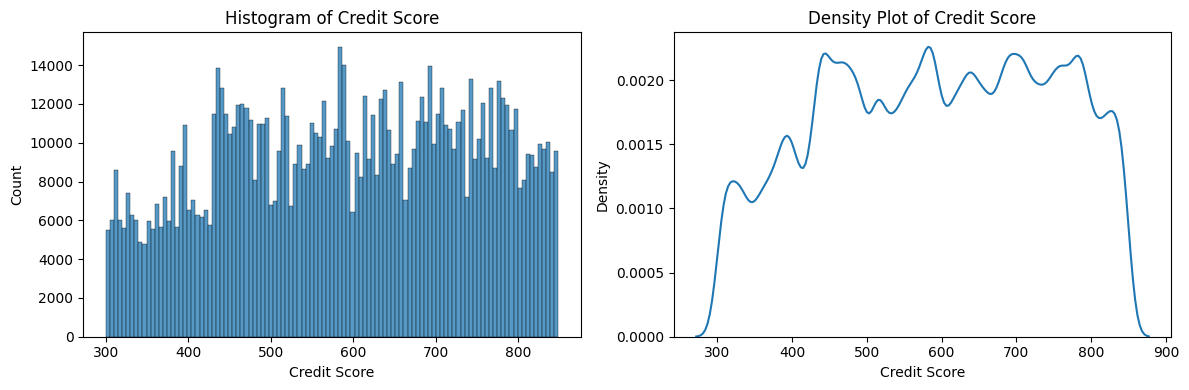

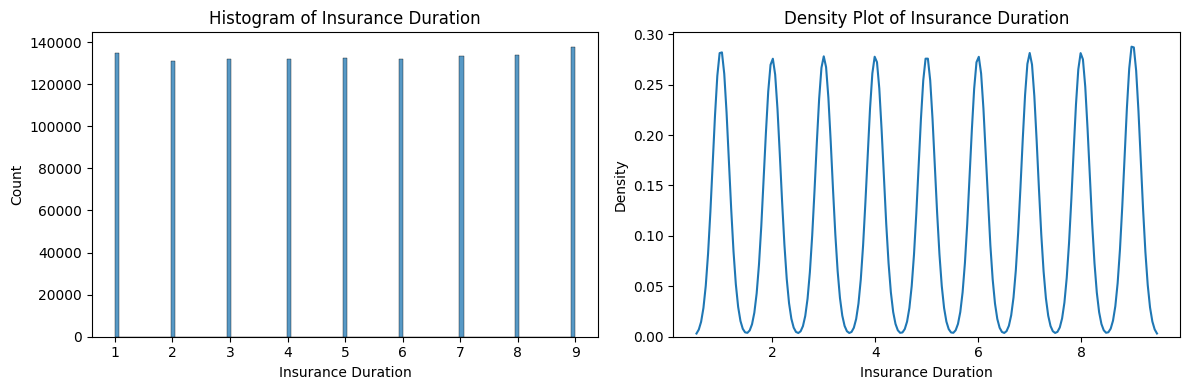

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding 'id' and target variable)
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in ['id', 'Premium Amount']]

# Create histograms and density plots
for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(data=train_df, x=col, kde=False, ax=axs[0])
    axs[0].set_title(f'Histogram of {col}')
    
    # Density plot
    sns.kdeplot(data=train_df, x=col, ax=axs[1])
    axs[1].set_title(f'Density Plot of {col}')
    
    plt.tight_layout()
    plt.show()

In [9]:
from scipy.stats import skew

# Calculate skewness for each numeric feature
skewness = train_df[num_cols].apply(skew)

# Display skewness values
print("Skewness:")
print(skewness)

# Apply log transformation to highly skewed variables
for col in num_cols:
    if skewness[col] > 1:
        train_df[f'{col}_log'] = np.log1p(train_df[col])
        print(f"Applied log transformation to {col}")

Skewness:
Age                    NaN
Annual Income          NaN
Number of Dependents   NaN
Health Score           NaN
Previous Claims        NaN
Vehicle Age            NaN
Credit Score           NaN
Insurance Duration     NaN
dtype: float64


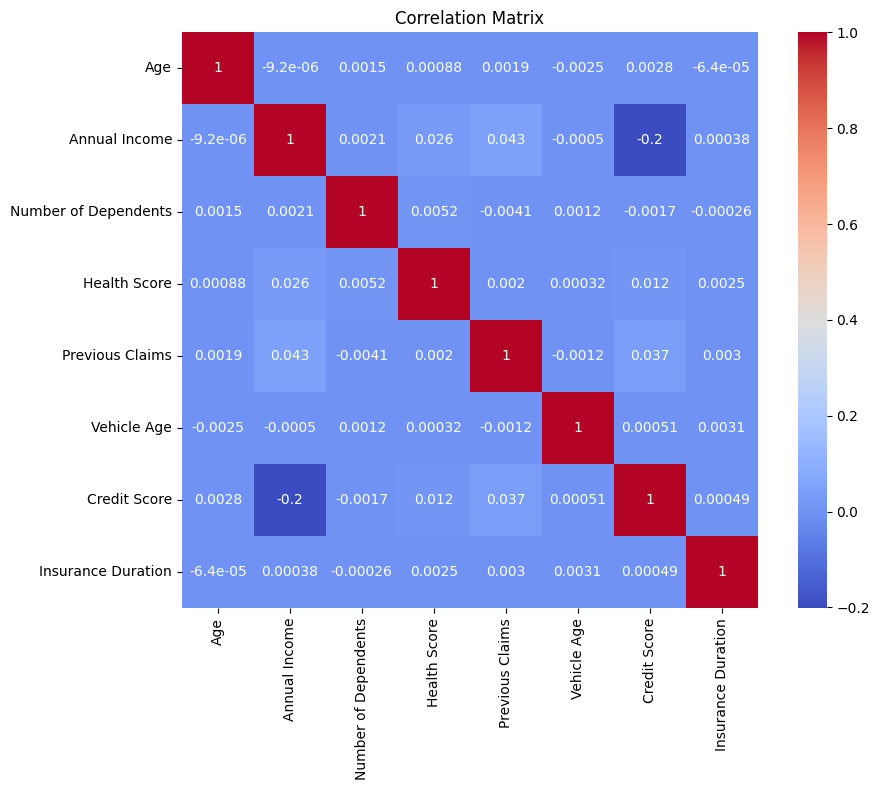

In [10]:
# Calculate correlation matrix
corr_matrix = train_df[num_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [11]:
# Create pair plots
sns.pairplot(train_df, vars=num_cols, hue='Premium Amount', diag_kind='kde')
plt.suptitle('Pair Plots')
plt.tight_layout()
plt.show()